In [4]:
from hamilton_ice.pipeline import get_func_args, object_io_nodes, build_pipeline
from hamilton_ice.io.artifact import artifact
from hamilton_ice.io.jsonl import jsonl_source, jsonl
from hamilton_ice.util.graphviz import dag_plot

class Example:
    @artifact
    def foo(bar, baz):
        return {"bar": bar["bar"], "baz": baz["baz"]}

    @artifact
    def bar():
        return {"bar": 1}

    @artifact
    def baz():
        return {"baz": 2}

    @staticmethod
    def bing():
        pass


    
build_pipeline(Example)

In [5]:
next(Example.foo.generator())

{'bar': 1, 'baz': 2}

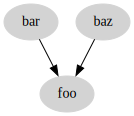

In [6]:
dag_plot(Example)

In [38]:
class StreamExample:
    @artifact
    def config():
        return {"setting":"hello"}

    @jsonl
    def bar(config):
        for j in range(0,10):
            yield f'{config["setting"]}, {j}'
    @jsonl
    def baz(bar, config):
        yield f'{bar}!, {config["setting"]}'
            

    
build_pipeline(StreamExample)

In [39]:
[s for s in StreamExample.baz.generator()]

['hello, 0!, hello',
 'hello, 1!, hello',
 'hello, 2!, hello',
 'hello, 3!, hello',
 'hello, 4!, hello',
 'hello, 5!, hello',
 'hello, 6!, hello',
 'hello, 7!, hello',
 'hello, 8!, hello',
 'hello, 9!, hello']

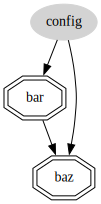

In [40]:
dag_plot(StreamExample)